In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Comment/balanced_data.csv")

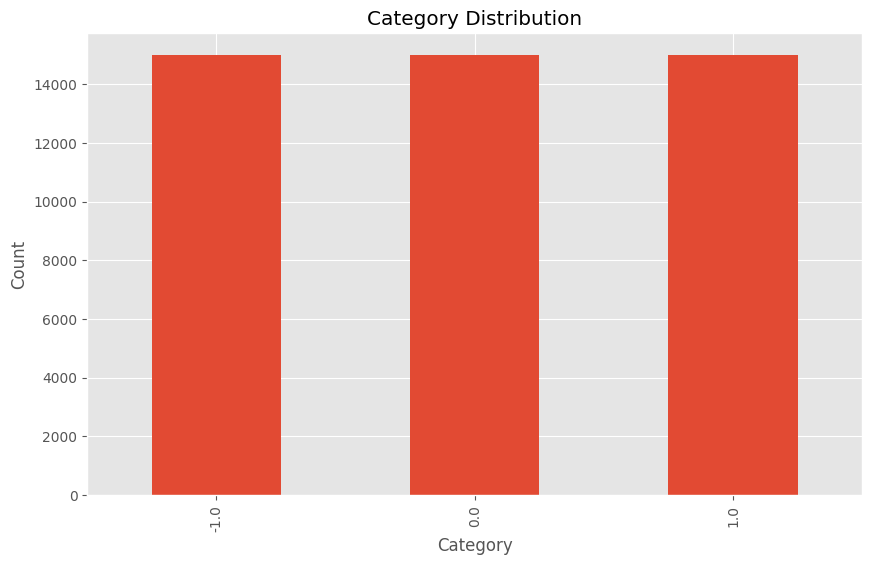

In [ ]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [ ]:
df.rename(columns = {"clean_text":"text"},inplace = True)

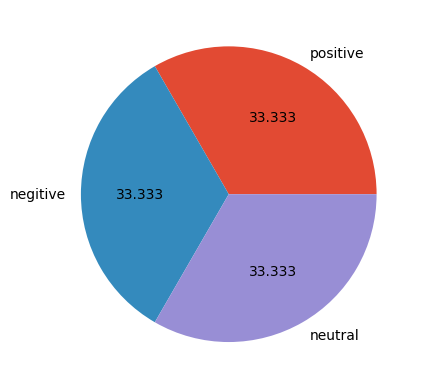

In [ ]:
plt.pie(df["category"].value_counts(),labels = ["positive","negitive","neutral"],autopct="%0.3f")
plt.show()

In [ ]:
pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
empty_tweet=df['text'].isna().value_counts()
print(empty_tweet)

False    44997
True         3
Name: text, dtype: int64


In [ ]:
df['clean_tweet']= df['text'].copy()
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
#handle emoji
df['clean_tweet'] = df['clean_tweet'].fillna('')

# Define a function to convert emojis to their textual representation
def convert_emoji(text):
    return emoji.demojize(text)

# Apply the convert_emoji() function to the clean_tweet column
df['clean_tweet'] = df['clean_tweet'].apply(convert_emoji)

# Create a new dataframe to store the converted tweets
new_df = pd.DataFrame(df['clean_tweet'], columns=['clean_tweet'])
new_df

,clean_tweet
0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...
...,...
44995,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...
44997,proud india cintict and modi
44998,sir are proud having our narendra modi india


In [ ]:
df[['clean_tweet']]=new_df[['clean_tweet']].copy()
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)
    return df
#Remove punctuation and special characters after handling contraction words
preprocessing_one(df)

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where baati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your pappu cannot even break grass just apprec...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import wordnet
#re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [ ]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [ ]:
contraction_dict=[(r'I\'m', 'I am'),(r'i\'m', 'i am'),(r'ain\'t', 'am not'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)n\'t', '\g<1> not'),
                  (r'can\'t', 'cannot'),(r'won\'t', 'will not'), (r'wont', 'will not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)\'d', '\g<1> would'), (r'(\w+)\'ve', '\g<1> have'),
                 (r'I\’m', 'I am'),(r'i\’m', 'i am'),(r'ain\’t', 'am not'),(r'(\w+)\’s', '\g<1> is'),(r'(\w+)\’re', '\g<1> are'),(r'(\w+)n\’t', '\g<1> not'),
                  (r'can\’t', 'cannot'),(r'won\’t', 'will not'), (r'(\w+)\’ll', '\g<1> will'), (r'(\w+)\’d', '\g<1> would'), (r'(\w+)\’ve', '\g<1> have')]
#Notice: The quotation of some texts are not in English
def handle_contraction(text):
    patterns_set=[(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text=re.sub(pattern, repl, text)
    return text
#test
print(df['clean_tweet'][4])
print(handle_contraction(df['clean_tweet'][4]))

rahul gandhis promise game changer while modis announcement violation model code conduct
slow claps for anchor 
rahul gandhis promise game changer while modis announcement violation model code conduct
slow claps for anchor 


In [ ]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
df=preprocessing_two(df)
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your papu canot even break grass just apprecia...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet']=df['clean_tweet'].replace('[^a-zA-Z]',' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace('\s+', ' ', regex=True)
    return df
df=replace_non_alphabetical(df)
df

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...
...,...,...,...
44995,your pappu cannot even break grass just apprec...,1.0,your papu canot even break grass just apprecia...
44996,last election modi made many promises most the...,1.0,last election modi made many promises most the...
44997,proud india cintict and modi,1.0,proud india cintict and modi
44998,sir are proud having our narendra modi india,1.0,sir are proud having our narendra modi india


In [ ]:
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
df=short_words(df)
df.head()

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...


In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head()

,text,category,clean_tweet
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         44997 non-null  object 
 1   category     45000 non-null  float64
 2   clean_tweet  45000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
missing_values = df['clean_tweet'].isnull()

# Replace missing values with an empty string or another placeholder
df.loc[missing_values, 'clean_tweet'] = ''

# Now, you can apply the `len` function to calculate the length of each string
df["num_characters"] = df["clean_tweet"].apply(len)

# Print the dataframe
print(df.head())

                                                text  category  \
0  its going good riddance from the failed modi g...      -1.0   
1  itself modi tremendous pressure failure all hi...      -1.0   
2  takluji yeh sab phaltu bakwass suun suun log g...      -1.0   
3  where baati bachao slogan killed one stroke modi       -1.0   
4  rahul gandhis promise game changer while modis...      -1.0   

                                         clean_tweet  num_characters  
0  its going good riddance from the failed modi g...             224  
1  itself modi tremendous pressure failure all hi...             236  
2  takluji yeh sab phaltu bakwas sun sun log gaye...             210  
3    where bati bachao slogan killed one stroke modi              47  
4  rahul gandhis promise game changer while modis...             110  


<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

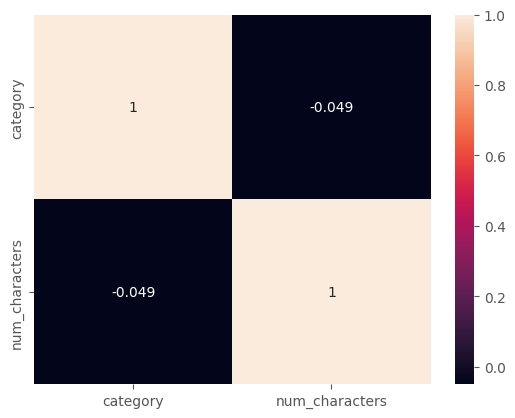

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.isnull()

,text,category,clean_tweet,num_characters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
44995,False,False,False,False
44996,False,False,False,False
44997,False,False,False,False
44998,False,False,False,False


In [ ]:
# df["num_sentances"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
# df.head()

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(44999, 4)

In [ ]:
df.dropna(inplace=True)

<ipython-input-39-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
df.isnull().sum() , df.duplicated().sum()

(text              0
 category          0
 clean_tweet       0
 num_characters    0
 dtype: int64,
 0)

In [ ]:
df.shape

(44997, 4)

In [ ]:
# import nltk
nltk.download("punkt")

# from nltk.corpus import stopwords
nltk.download('stopwords')

# faltu symbol's
string.punctuation
# from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nltk
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def transform_text(text):
    if isinstance(text, float) and pd.isna(text):
        return ""  # Return empty string for NaN values
    text = str(text).lower()  # Convert to string before applying string methods
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

df["transformed_text"]=df["text"].apply(transform_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-44-c302094d6ecc>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform_text)


In [ ]:
df.head()

,text,category,clean_tweet,num_characters,transformed_text
0,its going good riddance from the failed modi g...,-1.0,its going good riddance from the failed modi g...,224,go good riddanc fail modi govern elect time se...
1,itself modi tremendous pressure failure all hi...,-1.0,itself modi tremendous pressure failure all hi...,236,modi tremend pressur failur skill littl learn ...
2,takluji yeh sab phaltu bakwass suun suun log g...,-1.0,takluji yeh sab phaltu bakwas sun sun log gaye...,210,takluji yeh sab phaltu bakwass suun suun log g...
3,where baati bachao slogan killed one stroke modi,-1.0,where bati bachao slogan killed one stroke modi,47,baati bachao slogan kill one stroke modi
4,rahul gandhis promise game changer while modis...,-1.0,rahul gandhis promise game changer while modis...,110,rahul gandhi promis game changer modi announc ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
y = df["category"].values
print(y)

[-1. -1. -1. ...  1.  1.  1.]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg = SGDRegressor(max_iter = 100,learning_rate = "constant",eta0=0.01)

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
y_pred1= reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred1,y_test)

In [ ]:
accuracy_score(y_pred1,y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

0.6307777777777778
[[1652  954  460]
 [ 178 2614  132]
 [ 654  945 1411]]
              precision    recall  f1-score   support

        -1.0       0.67      0.54      0.60      3066
         0.0       0.58      0.89      0.70      2924
         1.0       0.70      0.47      0.56      3010

    accuracy                           0.63      9000
   macro avg       0.65      0.63      0.62      9000
weighted avg       0.65      0.63      0.62      9000



In [ ]:
r2_score(y_pred1,y_test)

-0.4939614295695376

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test, y_pred2))

0.7166666666666667
[[2330  358  378]
 [ 499 2102  323]
 [ 593  399 2018]]
              precision    recall  f1-score   support

        -1.0       0.68      0.76      0.72      3066
         0.0       0.74      0.72      0.73      2924
         1.0       0.74      0.67      0.70      3010

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.72      9000
weighted avg       0.72      0.72      0.72      9000



In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7151111111111111
[[2174  469  423]
 [ 352 2338  234]
 [ 613  473 1924]]
              precision    recall  f1-score   support

        -1.0       0.69      0.71      0.70      3066
         0.0       0.71      0.80      0.75      2924
         1.0       0.75      0.64      0.69      3010

    accuracy                           0.72      9000
   macro avg       0.72      0.72      0.71      9000
weighted avg       0.72      0.72      0.71      9000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'LR': lrc,
    'RF': rfc,
    'BgC': bc,
    'ETC': etc
}

In [ ]:
lrc.fit(X_train,y_train)
y_pred3 = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.8233333333333334
[[2425  368  273]
 [ 134 2676  114]
 [ 301  400 2309]]
              precision    recall  f1-score   support

        -1.0       0.85      0.79      0.82      3066
         0.0       0.78      0.92      0.84      2924
         1.0       0.86      0.77      0.81      3010

    accuracy                           0.82      9000
   macro avg       0.83      0.82      0.82      9000
weighted avg       0.83      0.82      0.82      9000



In [ ]:
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7774444444444445
[[2259  411  396]
 [ 226 2581  117]
 [ 392  461 2157]]
              precision    recall  f1-score   support

        -1.0       0.79      0.74      0.76      3066
         0.0       0.75      0.88      0.81      2924
         1.0       0.81      0.72      0.76      3010

    accuracy                           0.78      9000
   macro avg       0.78      0.78      0.78      9000
weighted avg       0.78      0.78      0.78      9000



In [ ]:
bc.fit(X_train,y_train)
y_pred3 = bc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.7602222222222222
[[2117  467  482]
 [ 230 2520  153]
 [ 374  452 2205]]
              precision    recall  f1-score   support

        -1.0       0.78      0.69      0.73      3066
         0.0       0.73      0.87      0.79      2903
         1.0       0.78      0.73      0.75      3031

    accuracy                           0.76      9000
   macro avg       0.76      0.76      0.76      9000
weighted avg       0.76      0.76      0.76      9000



In [ ]:
etc.fit(X_train,y_train)
y_pred3 = etc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.8103333333333333
[[2382  314  370]
 [ 207 2575  121]
 [ 343  352 2336]]
              precision    recall  f1-score   support

        -1.0       0.81      0.78      0.79      3066
         0.0       0.79      0.89      0.84      2903
         1.0       0.83      0.77      0.80      3031

    accuracy                           0.81      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.81      0.81      0.81      9000



In [ ]:
svc.fit(X_train,y_train)
y_pred3 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test, y_pred3))

0.8113333333333334
[[2392  359  315]
 [ 192 2607  104]
 [ 342  386 2303]]
              precision    recall  f1-score   support

        -1.0       0.82      0.78      0.80      3066
         0.0       0.78      0.90      0.83      2903
         1.0       0.85      0.76      0.80      3031

    accuracy                           0.81      9000
   macro avg       0.81      0.81      0.81      9000
weighted avg       0.81      0.81      0.81      9000

